In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Transformers
==============

Unsupervised transformations for preprocessing
--------------------------------------------------

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [5]:
np.set_printoptions(suppress=True)
print(X_train)

[[   0.07165    0.        25.65    ...,   19.1      377.67      14.27   ]
 [   0.62356    0.         6.2     ...,   17.4      390.39       9.93   ]
 [   0.01301   35.         1.52    ...,   15.5      394.74       5.49   ]
 ..., 
 [   0.19133   22.         5.86    ...,   19.1      389.13      18.46   ]
 [   1.62864    0.        21.89    ...,   21.2      396.9       34.41   ]
 [   0.7258     0.         8.14    ...,   21.       390.95      11.28   ]]


In [6]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [   3.21988459   11.80870712   11.07923483    0.06332454    0.55159288
    6.28243799   68.92269129    3.81285567    9.34828496  404.69656992
   18.41451187  358.45168865   12.65203166] 
standard deviation : [   7.37571521   23.71846643    6.92886123    0.24354577    0.11261584
    0.69624884   27.79735304    2.05182371    8.58790129  167.42573753
    2.16016355   88.06205559    6.94933564] 


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_scaled = scaler.transform(X_train)

In [11]:
print(X_scaled.shape)

(379, 13)


In [12]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [-0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0.] 
standard deviation : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 


In [13]:
X_scaled_test = scaler.transform(X_test)

Principal Component Analysis
=============================

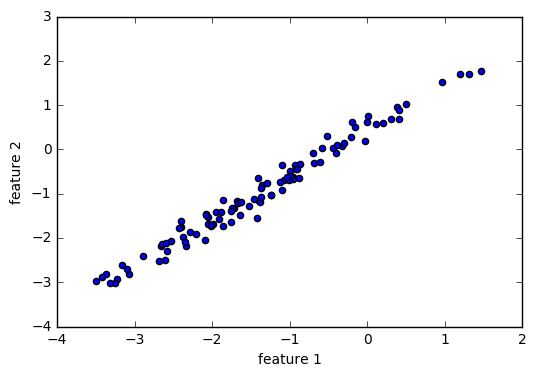

In [14]:
rnd = np.random.RandomState(42)
X_blob = np.dot(rnd.normal(size=(100, 2)), rnd.normal(size=(2, 2))) + rnd.normal(size=2)
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [15]:
from sklearn.decomposition import PCA
pca = PCA()

In [16]:
pca.fit(X_blob)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

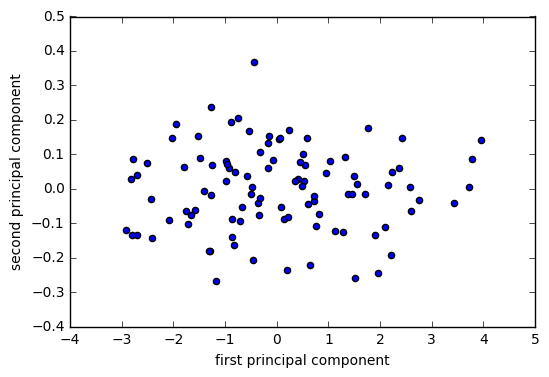

In [17]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

PCA for dimensionality Reduction
---------------------------------

In [18]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)
X, y = digits.data, digits.target
print(X.shape)

(901, 64)


In [19]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_reduced = pca.transform(X)
print("Reduced dataset shape: %s" % (X_reduced.shape, ))

Reduced dataset shape: (901, 2)


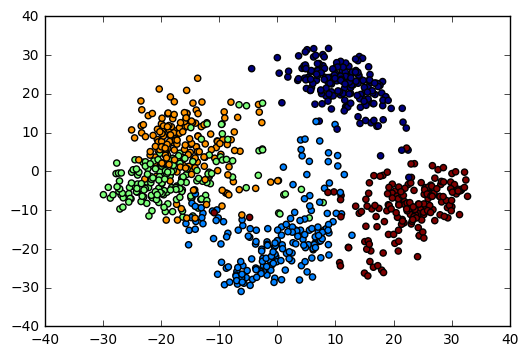

In [21]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)